# 网络总体特征

In [110]:
import networkx as nx
import pandas as pd
import numpy as np
# 读取图
G=nx.DiGraph()
nodes = pd.read_csv("data/fb_nodes.csv")
edges = pd.read_csv("data/fb-pages-government.csv")
G.add_nodes_from(nodes["Id"])
G.add_edges_from(edges.apply(lambda x: tuple(x), axis=1).values.tolist())
# 转化无向图
UG = G.to_undirected()
UG.remove_edges_from(nx.selfloop_edges(UG))

FB-GOVERN网络图是否是弱连通图: True
FB-GOVERN网络图是否是强连通图: False
FB-GOVERN网络图的密度: 0.0017964946594574724
FB-GOVERN网络图的平均路径长度: 0.8156462103050091
FB-GOVERN网络图的直径: 10
FB-GOVERN网络图的平均聚类系数: 0.20544211311222643
FB-GOVERN网络图的平均度: 12.676066317131927
FB-GOVERN网络图的度同配系数: 0.06455798855760314


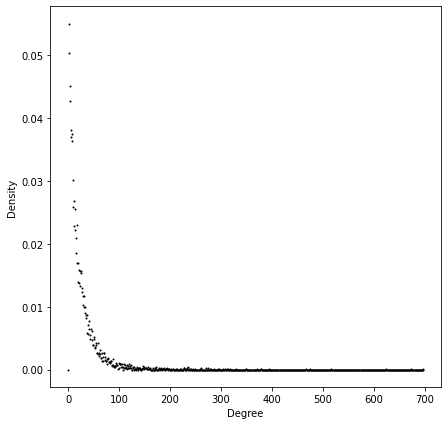

In [111]:
from matplotlib import pyplot as plt
# 计算网络拓扑结构
#判断是否是连通图
print('FB-GOVERN网络图是否是弱连通图:',nx.is_weakly_connected(G))
print('FB-GOVERN网络图是否是强连通图:',nx.is_strongly_connected(G))
#计算密度
print('FB-GOVERN网络图的密度:',nx.density(G))
# 富人俱乐部系数(转化成无向图)
# print('FB-GOVERN网络图的富人俱乐部系数:',nx.rich_club_coefficient(UG))

# 平均路径长度
print('FB-GOVERN网络图的平均路径长度:',nx.average_shortest_path_length(G))
# 直径（无向图，因为图不是强连通，所以有向图的直径为正无穷）
print('FB-GOVERN网络图的直径:',nx.diameter(UG))
# 平均聚类系数
print('FB-GOVERN网络图的平均聚类系数:',nx.average_clustering(G))
# 平均度
degree = pd.DataFrame(G.degree(),columns=["nodes","degree"])
print('FB-GOVERN网络图的平均度:',np.mean(degree["degree"].values)/2)
# 度分布图
degree=nx.degree_histogram(G)
x=range(len(degree))#生成X轴序列，从1到最大度
y=[z/float(sum(degree))for z in degree]#将频次转化为频率，利用列表内涵
plt.figure(figsize=(7,7))
plt.scatter(x,y,s=1,color=(0,0,0))#在双对坐标轴上绘制度分布曲线
plt.xlabel("Degree")
plt.ylabel("Density")
plt.savefig("degree_distribution.png",dpi = 300)#显示图表

#度同配系数
print('FB-GOVERN网络图的度同配系数:',nx.degree_assortativity_coefficient(G))

# 节点重要性度量

In [113]:
G.remove_edges_from(nx.selfloop_edges(G)) #删除自连接边
DC = nx.degree(G) #度中心性 
BC = nx.degree_centrality(G) #介数中心性
CC = nx.closeness_centrality(G) #接近中心性
KC = nx.core_number(G) # k核值(k-core)
EC = nx.eigenvector_centrality(G,max_iter = 500) #特征向量中心性
PR = nx.pagerank(G) #PageRank算法

In [116]:
def get_top(dic,num,name): # 通过name算法,获取的dic中value最大的num个(结点,中心度)对
    sorted_dic = sorted(dict(dic).items(), key=lambda x: x[1],reverse=True)[:num] #将dic强制转化为字典格式并按照value由大到小排序，取出前num个
    data = pd.DataFrame(sorted_dic,columns=['nodes',name]) #转为dataframe格式
    return data.set_index(["nodes"]) #将结点编号作为index
result = pd.concat([get_top(DC,3,"DC"),get_top(BC,3,"BC"),get_top(CC,3,"CC"),get_top(KC,3,"KC"),get_top(EC,3,"EC"),get_top(PR,3,"PR")])
result

,DC,BC,CC,KC,EC,PR
nodes,,,,,,
5320,697.0,NaN,NaN,NaN,NaN,NaN
6615,674.0,NaN,NaN,NaN,NaN,NaN
2141,625.0,NaN,NaN,NaN,NaN,NaN
5320,NaN,0.098781,NaN,NaN,NaN,NaN
6615,NaN,0.095522,NaN,NaN,NaN,NaN
2141,NaN,0.088577,NaN,NaN,NaN,NaN
6615,NaN,NaN,0.291415,NaN,NaN,NaN
4028,NaN,NaN,0.283374,NaN,NaN,NaN
6872,NaN,NaN,0.267894,NaN,NaN,NaN


# 好友推荐